# **Step1 : Import all necessary libraries and Load Dataset**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load wine dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

# **Step 2: Explore and Standardize the Dataset**

In [7]:
# Convert to DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['Target'] = y
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


# **Step 3: Apply PCA**

In [10]:
# Apply PCA

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data

X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca[:5]



array([[ 3.31675081,  1.44346263],
       [ 2.20946492, -0.33339289],
       [ 2.51674015,  1.0311513 ],
       [ 3.75706561,  2.75637191],
       [ 1.00890849,  0.86983082]])

# **Step 4: Visualize PCA Output in 2D**

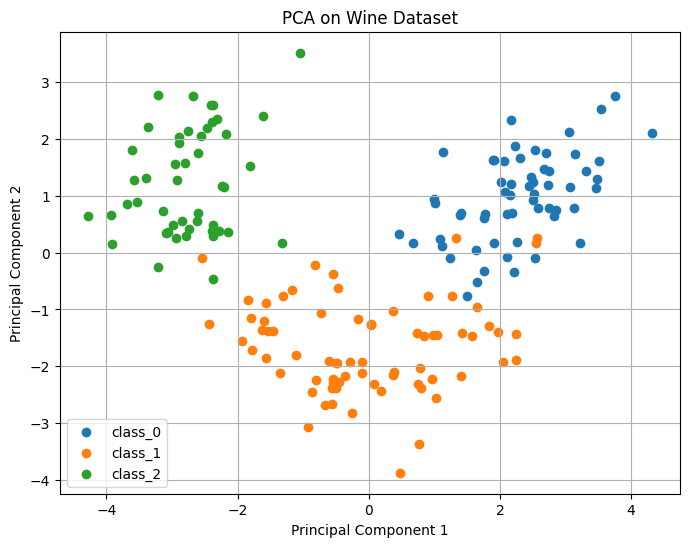

In [11]:
# Plot the PCA-transformed data
plt.figure(figsize=(8,6))
for i, target_name in enumerate(target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Wine Dataset')
plt.legend()
plt.grid(True)
plt.show()


# **Step 5:Explained Variance Ratio and Scree Plot**

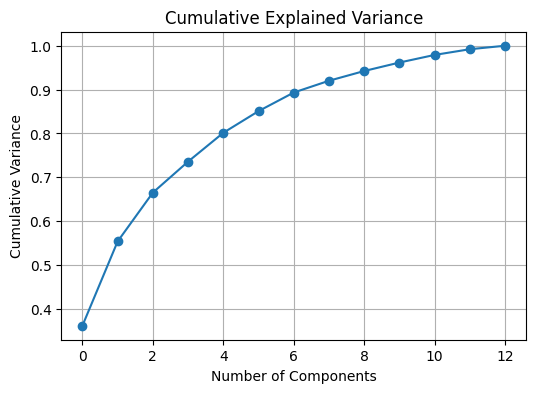

In [12]:
pca_full = PCA().fit(X_scaled)  # Fit PCA on the standardized data
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance")
plt.grid(True)
plt.show()


In [14]:
data=pd.read_csv("/content/parkinsons_data.csv")
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [17]:
data.isnull().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


In [18]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
190,False
191,False
192,False
193,False


In [19]:
# Drop the 'name' column (not a feature)
data.drop(columns=['name'], inplace=True)

In [21]:
# Separate features and target variable (status column)
X = data.drop(columns=['status'])  # Features
y = data['status']

In [22]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# Apply PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca[:5]

array([[ 2.0966143 , -1.55060712],
       [ 4.70933096, -1.33459335],
       [ 3.85261522, -1.42622131],
       [ 4.13477146, -1.58191374],
       [ 5.68969044, -1.1503138 ]])

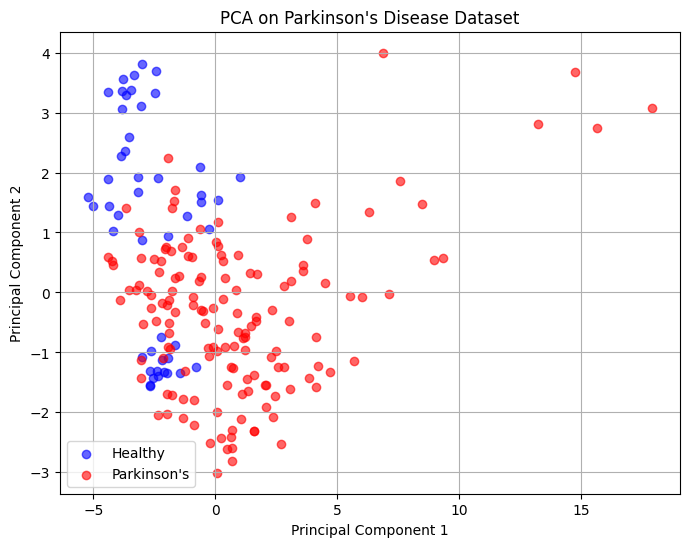

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], label='Healthy', alpha=0.6, c='blue')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], label='Parkinson\'s', alpha=0.6, c='red')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Parkinson\'s Disease Dataset')
plt.legend()
plt.grid(True)
plt.show()


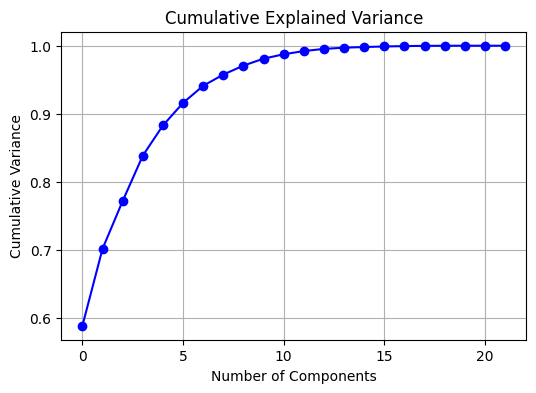

In [30]:
# Explained variance ratio plot
pca_full = PCA().fit(X_scaled)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(6, 4))
plt.plot(cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.grid(True)
plt.show()

In [31]:
explained_variance = np.cumsum(pca_full.explained_variance_ratio_)
print(f"Variance explained by first 2 components: {explained_variance[1] * 100:.2f}%")
print(f"Variance explained by first 3 components: {explained_variance[2] * 100:.2f}%")



Variance explained by first 2 components: 70.20%
Variance explained by first 3 components: 77.21%


In [32]:

# Analysis
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by Component: {explained_variance}")
if explained_variance.sum() > 0.85:
    print("PCA captures significant variance, suggesting potential class separation.")
else:
    print("PCA may not be optimal for separation; consider other techniques.")

Explained Variance by Component: [0.58900504 0.1129943 ]
PCA may not be optimal for separation; consider other techniques.


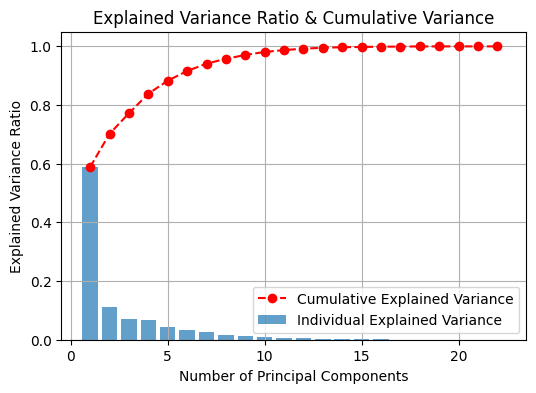

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Explained Variance Ratio Plot
plt.figure(figsize=(6, 4))
plt.bar(range(1, len(pca_full.explained_variance_ratio_) + 1),
        pca_full.explained_variance_ratio_, alpha=0.7, label="Individual Explained Variance")
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1),
         np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='--', color='r',
         label="Cumulative Explained Variance")

# Labels & Legend
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance Ratio & Cumulative Variance")
plt.legend()
plt.grid(True)
plt.show()
